In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the log file into a DataFrame
df_3DCNN = pd.read_csv('3rd_working_cnn_final/training.log', sep=' - ', engine='python', names=['timestamp', 'message'])

# Extract epoch number and loss from the message
df_3DCNN['epoch'] = df_3DCNN['message'].str.extract(r'Epoch (\d+)/', expand=False).astype(float)
df_3DCNN['loss'] = df_3DCNN['message'].str.extract(r'Average Loss: (\d+\.\d+)', expand=False).astype(float)

# Drop rows with missing values
df_3DCNN = df_3DCNN.dropna()

# Exclude the first row from the DataFrame
df_3DCNN = df_3DCNN.iloc[1:]

In [3]:
# Read the log file into a DataFrame
df_2DCNN = pd.read_csv('training2d.log', sep=' - ', engine='python', names=['timestamp', 'message'])

# Extract epoch number and loss from the message
df_2DCNN['epoch'] = df_2DCNN['message'].str.extract(r'Epoch (\d+)/', expand=False).astype(float)
df_2DCNN['loss'] = df_2DCNN['message'].str.extract(r'Average Loss: (\d+\.\d+)', expand=False).astype(float)

# Drop rows with missing values
df_2DCNN = df_2DCNN.dropna()

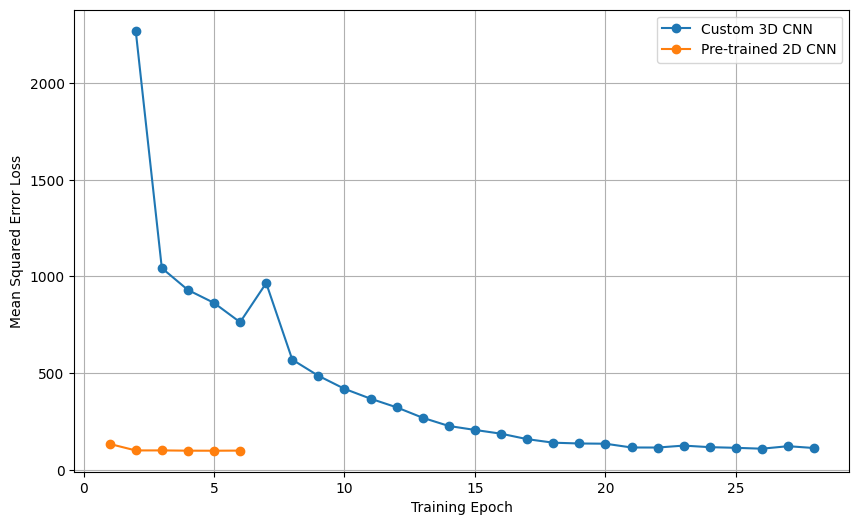

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_3DCNN['epoch'], df_3DCNN['loss'], marker='o', label='Custom 3D CNN')
plt.plot(df_2DCNN['epoch'], df_2DCNN['loss'], marker='o', label='Pre-trained 2D CNN')
#plt.title('Training Loss Over Time')
plt.xlabel('Training Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.grid(True)
#plt.yscale('log')
plt.legend()
plt.show()

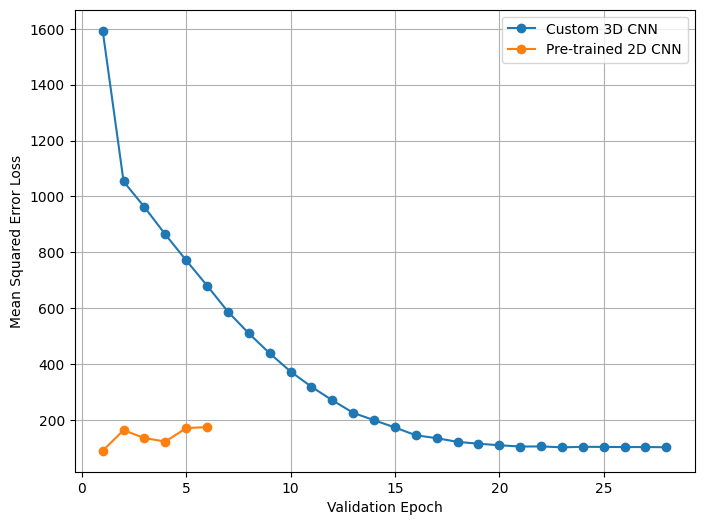

In [5]:
import re

validation_losses_3DCNN = []
with open('3rd_working_cnn_final/training.log', 'r') as f:
    for line in f:
        if "Validation Loss" in line:
            loss = float(re.search(r"Validation Loss: (\d+\.\d+)", line).group(1))
            validation_losses_3DCNN.append(loss)

# Create a list of epoch numbers starting from 1
epochs_3DCNN = range(1, len(validation_losses_3DCNN) + 1)

validation_losses_2DCNN = []
with open('training2d.log', 'r') as f:
    for line in f:
        if "Validation Loss" in line:
            loss = float(re.search(r"Validation Loss: (\d+\.\d+)", line).group(1))
            validation_losses_2DCNN.append(loss)

# Create a list of epoch numbers starting from 1
epochs_2DCNN = range(1, len(validation_losses_2DCNN) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs_3DCNN, validation_losses_3DCNN, marker='o', label='Custom 3D CNN')
plt.plot(epochs_2DCNN, validation_losses_2DCNN, marker='o', label='Pre-trained 2D CNN')
#plt.title('Validation Loss Over Time')
plt.xlabel('Validation Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
# Read the log file into a DataFrame
df_3DCNN_oversampled = pd.read_csv('training.log', sep=' - ', engine='python', names=['timestamp', 'message'])

# Extract epoch number and loss from the message
df_3DCNN_oversampled['epoch'] = df_3DCNN_oversampled['message'].str.extract(r'Epoch (\d+)/', expand=False).astype(float)
df_3DCNN_oversampled['loss'] = df_3DCNN_oversampled['message'].str.extract(r'Average Loss: (\d+\.\d+)', expand=False).astype(float)

# Drop rows with missing values
df_3DCNN_oversampled = df_3DCNN_oversampled.dropna()

# Exclude the first row from the DataFrame
df_3DCNN_oversampled = df_3DCNN_oversampled.iloc[1:]

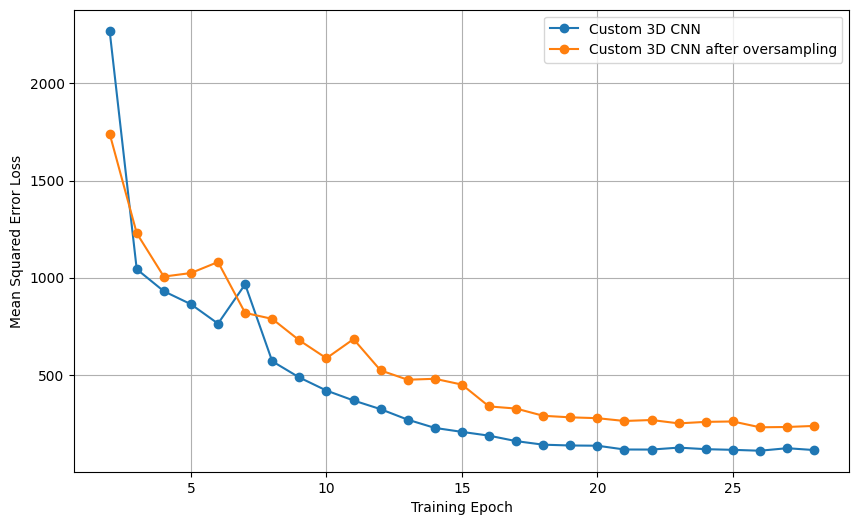

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_3DCNN['epoch'], df_3DCNN['loss'], marker='o', label='Custom 3D CNN')
plt.plot(df_3DCNN_oversampled['epoch'], df_3DCNN_oversampled['loss'], marker='o', label='Custom 3D CNN after oversampling')
#plt.title('Training Loss Over Time')
plt.xlabel('Training Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.grid(True)
#plt.yscale('log')
plt.legend()
plt.show()

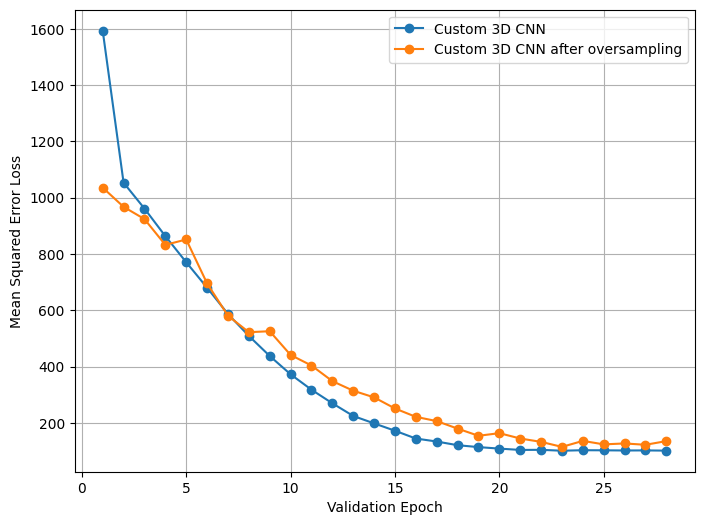

In [8]:
validation_losses_3DCNN_oversampled = []
with open('training.log', 'r') as f:
    for line in f:
        if "Validation Loss" in line:
            loss = float(re.search(r"Validation Loss: (\d+\.\d+)", line).group(1))
            validation_losses_3DCNN_oversampled.append(loss)

# Create a list of epoch numbers starting from 1
epochs_3DCNN_oversampled = range(1, len(validation_losses_3DCNN_oversampled) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs_3DCNN, validation_losses_3DCNN, marker='o', label='Custom 3D CNN')
plt.plot(epochs_3DCNN_oversampled, validation_losses_3DCNN_oversampled, marker='o', label='Custom 3D CNN after oversampling')
#plt.title('Validation Loss Over Time')
plt.xlabel('Validation Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.grid(True)
plt.legend()
plt.show()